# Problem Set 1

In [14]:
import numpy as np

import astropy.units as u
import astropy.constants as const

import matplotlib.pyplot as plt

import pandas as pd

In [6]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

## 2.1

### a

In [7]:
Teff = 2700 * u.K
L = 10**(5.5) * u.L_sun
R = np.sqrt(L / (4 * np.pi * const.sigma_sb * Teff**4))
R.to(u.Rsun).round(0)

<Quantity 2570. solRad>

### b

In [8]:
M = 20 * u.Msun
rho = M / (4/3 * np.pi * R**3)
rho.to(u.kg / u.m**3).round(8)

<Quantity 1.66e-06 kg / m3>

### c

In [9]:
def escape_velocity(M, R):
    return np.sqrt(2 * const.G * M / R)
    
v_esc = escape_velocity(M, R)
v_esc.to(u.m / u.s).round(-2)

<Quantity 54500. m / s>

### d

In [10]:
# ratios
rho_sun = 1.41 * u.g/u.cm**3
print(R.to(u.Rsun).round(0).value)
print((rho / rho_sun).decompose())
print((v_esc / escape_velocity(u.Msun, u.Rsun)).decompose())

2570.0
1.1781084645660287e-09
0.08821697906566281


## 4.4

In [17]:
X, Y, Z = 0.7, 0.28, 0.02
mu = (2 * X + 3/4 * Y + 1/2 * Z)**(-1)
mu_e = 2 / (1 + X)

In [45]:
density_range = np.logspace(-10, 10, 1000)
log_density_range = np.log10(density_range)

logT_rad_ideal = np.log10(3.2e7 * mu**(-1/3) * density_range**(1/3))
logT_ideal_degen = np.log10(1.21e5 * mu * mu_e**(-5/3) * density_range**(2/3))
logT_ideal_degen_highT = np.log10(1.50e7 * mu * mu_e**(-4/3) * density_range**(1/3))

In [97]:
df.columns

Index(['time', 'mass', 'lg(L)', 'lg(Teff)', '1H_surf', '4He_surf', '12C_surf',
       '13C_surf', '14N_surf', '16O_surf', '17O_surf', '18O_surf', '20Ne_surf',
       '22Ne_surf', '26Al_surf', 'Mcc/Mt', 'lg(Teff).1', 'lg(Md)', 'lg(rhoc)',
       'lg(Tc)', '1H_cen', '4He_cen', '12C_cen', '13C_cen', '14N_cen',
       '16O_cen', '17O_cen', '18O_cen', '20Ne_cen', '22Ne_cen', '26Al_cen',
       'Omeg_surf', 'Omeg_cen', 'Rp/Req', 'Md/Md(0)', 'v_crit1', 'v_crit2',
       'v_equa', 'Om/Om_cr', 'Gamma_Ed', 'lg(Mdot_mech)', 'L_tot'],
      dtype='object')

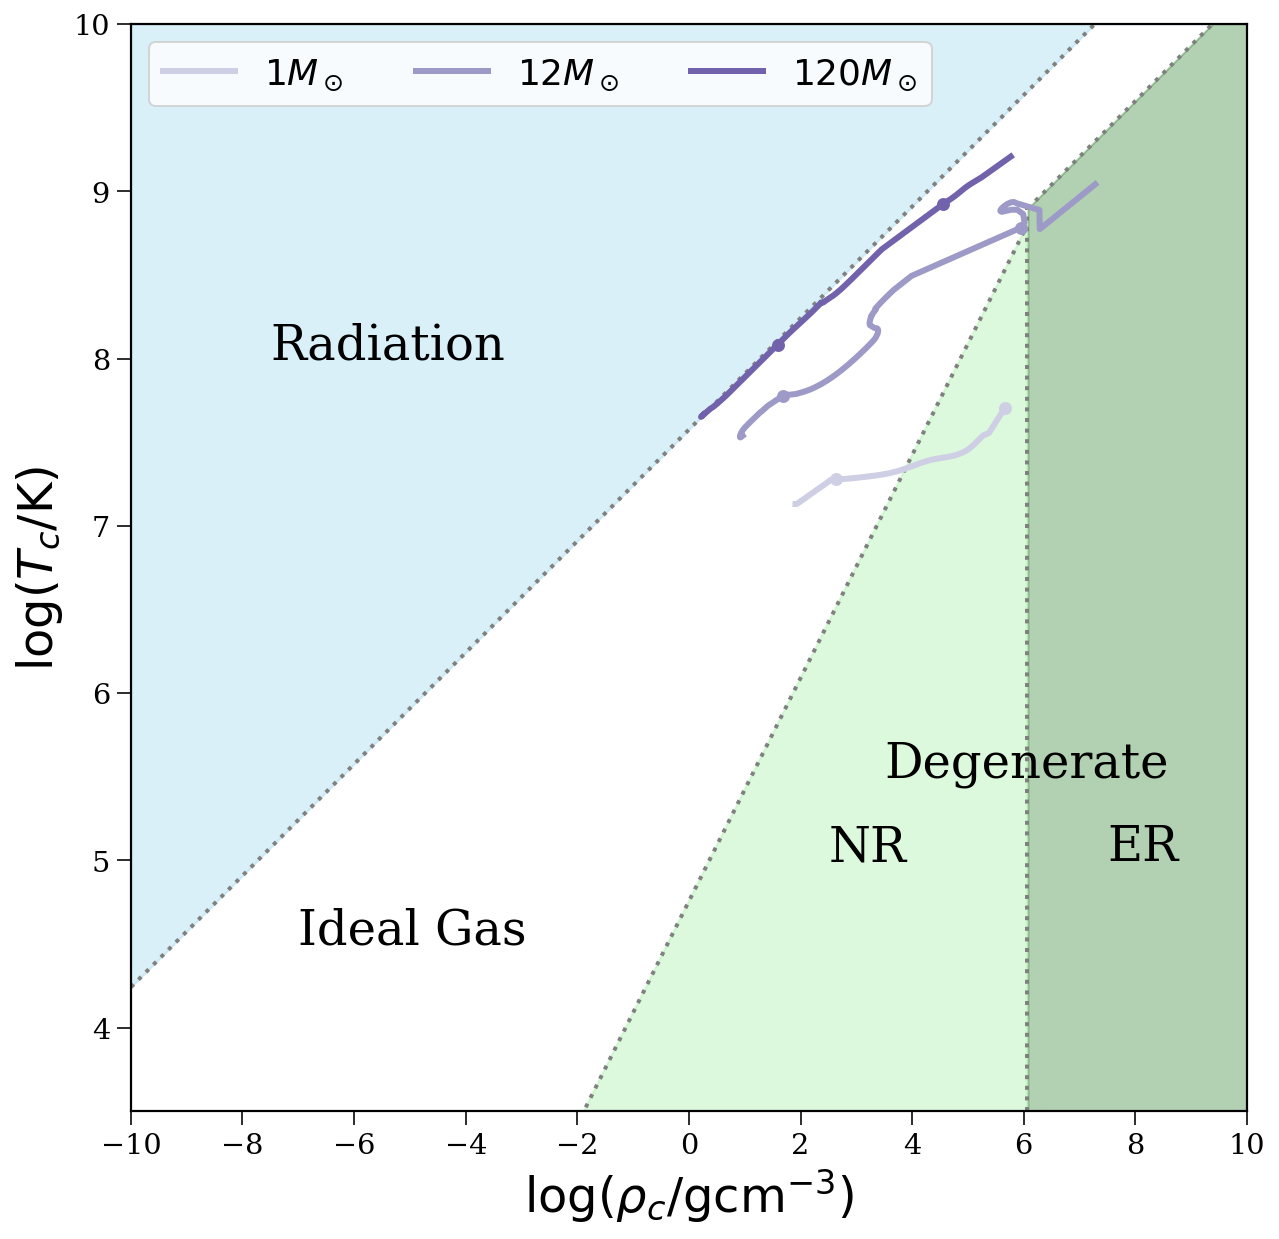

In [109]:
files = ["1msun.dat", "12msun.dat", "120msun.dat"]
labels = [r"$1 M_{\rm \odot}$", r"$12 M_{\rm \odot}$", r"$120 M_{\rm \odot}$"]
colors = [plt.get_cmap("Purples")(0.1 + x) for x in [0.2, 0.4, 0.6]]

fig, ax = plt.subplots(figsize=(10, 10))

for file, label, color in zip(files, labels, colors):
    df = pd.read_fwf("data/{}".format(file), index_col=0, skiprows=0)
    df.drop(df.index[0], inplace=True)
    
    # mask = df["1H_cen"].values.astype(float) < 0.01
    
    ax.plot(df["lg(rhoc)"].values.astype(float), df["lg(Tc)"].values.astype(float),
            label=label, lw=3, zorder=10, color=color)
    
    for ind in [110, 370]:
        ax.scatter(df["lg(rhoc)"].values.astype(float)[ind - 1], df["lg(Tc)"].values.astype(float)[ind - 1],
                   s=30, zorder=11, color=color)

high_rho = density_range > 9.7e5 * mu_e
low_rho = density_range <= 9.7e5 * mu_e

ls = "dotted"
lw = 2

ax.fill_between(log_density_range, logT_rad_ideal, np.ones_like(logT_rad_ideal) * 10, alpha=0.3, color="skyblue", zorder=-1)
ax.fill_between(log_density_range[low_rho], np.ones_like(logT_ideal_degen[low_rho]) * 3.5,
                logT_ideal_degen[low_rho], alpha=0.3, color="lightgreen")
ax.fill_between(log_density_range[high_rho], np.ones_like(logT_ideal_degen_highT[high_rho]) * 3.5,
                logT_ideal_degen_highT[high_rho], alpha=0.3, color="darkgreen")

ax.plot(log_density_range, logT_rad_ideal, color="grey", linestyle=ls, lw=lw)
ax.plot(log_density_range[low_rho], logT_ideal_degen[low_rho], color="grey", linestyle=ls, lw=lw)
ax.plot(log_density_range[high_rho], logT_ideal_degen_highT[high_rho], color="grey", linestyle=ls, lw=lw)
ax.plot(np.log10([9.7e5 * mu_e, 9.7e5 * mu_e]), [3.5, logT_ideal_degen_highT[high_rho][0]], color="grey", linestyle=ls, lw=lw)

ax.annotate("Radiation", xy=(-7.5, 8), fontsize=fs)
ax.annotate("Ideal Gas", xy=(-7, 4.5), fontsize=fs)
ax.annotate("Degenerate", xy=(3.5, 5.5), fontsize=fs)
ax.annotate("NR", xy=(2.5, 5), fontsize=fs)
ax.annotate("ER", xy=(7.5, 5), fontsize=fs)

ax.legend(ncol=3, loc="upper left", fontsize=0.75*fs)

ax.set_xlabel(r"$\log (\rho_c / \mathrm{g cm^{-3}})$")
ax.set_ylabel(r"$\log (T_c / \mathrm{K})$")

ax.set_xlim(-10, 10)
ax.set_ylim(3.5, 10)

ax.set_xticks(range(-10, 11, 2))

plt.savefig("figures/central_T_rho.pdf", format="pdf", bbox_inches="tight")

plt.show()

# 6.1

In [131]:
df = pd.read_csv("data/appendix_d.dat", delim_whitespace=True)

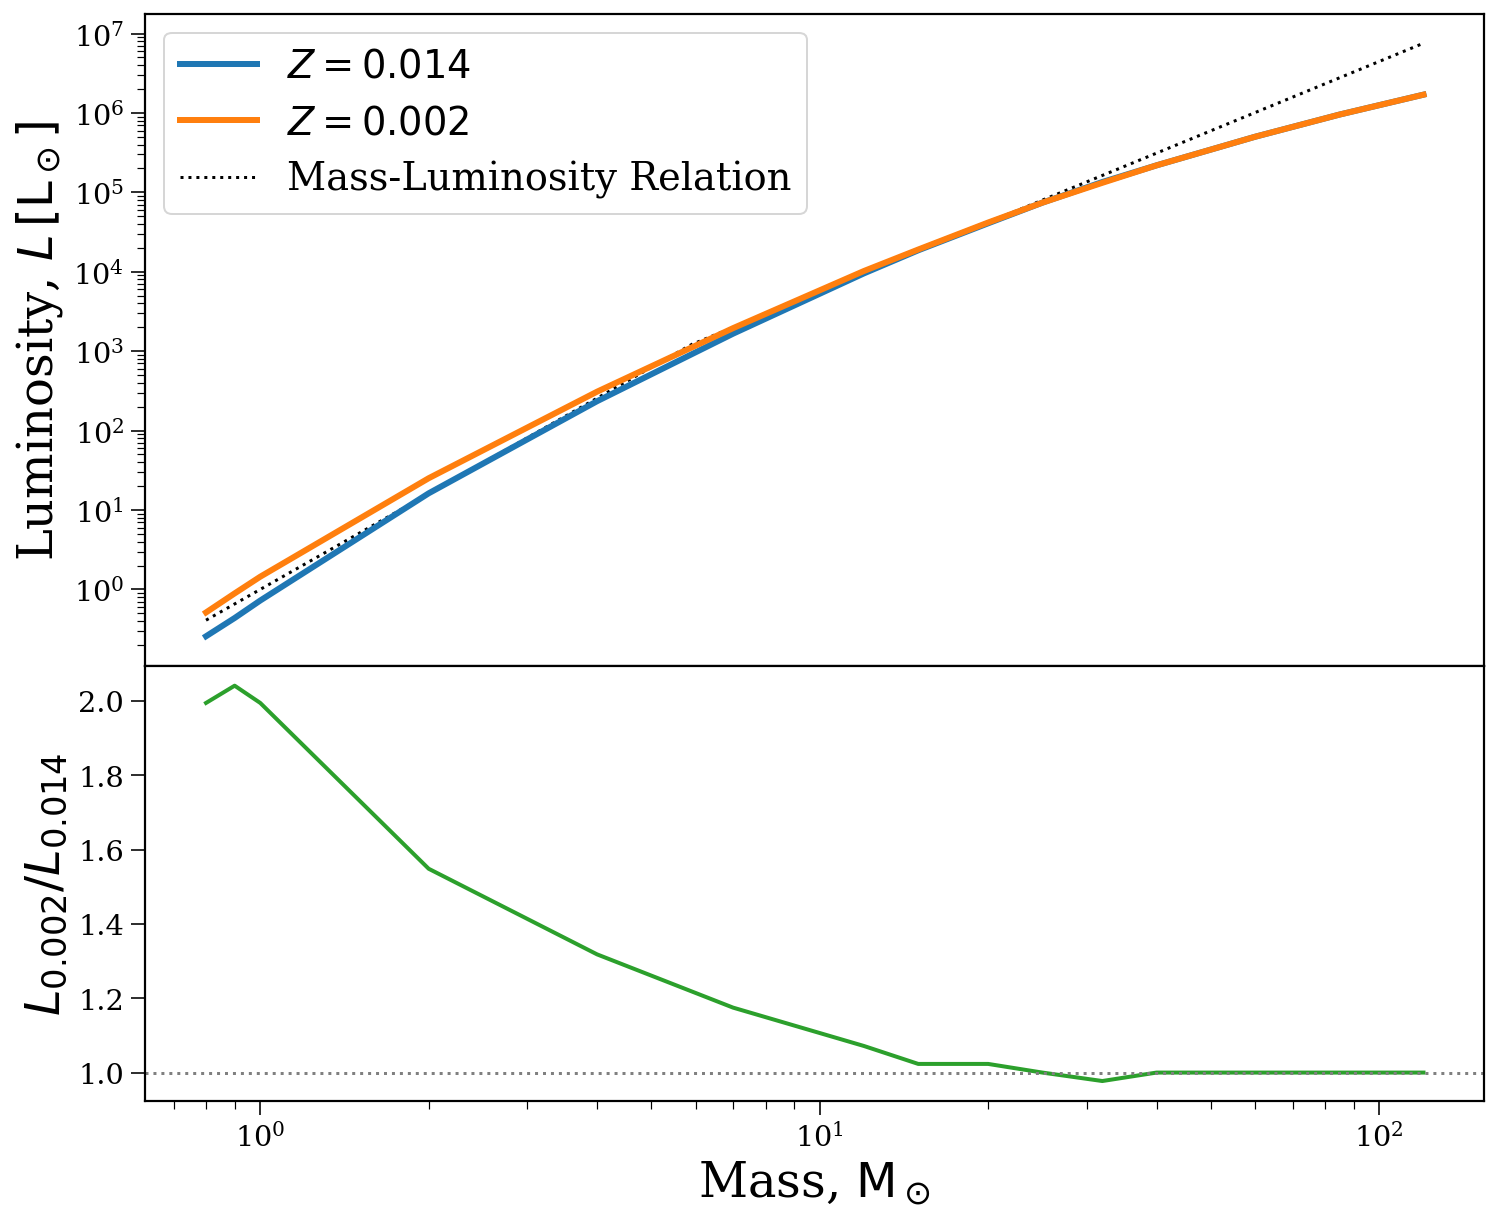

In [171]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={"height_ratios": [3, 2]})

fig.subplots_adjust(hspace=0.0)

masses = np.logspace(np.log10(0.8), np.log10(120), 1000)
lums = np.zeros_like(masses)
lums = masses**(3.8)
lums[masses < 6] = masses[masses < 6]**4
lums[masses >= 6] = masses[masses < 6][-1]**4 / masses[masses >= 6][0]**(2.9) * masses[masses >= 6]**(2.9)

axes[0].loglog(df["Mass"], 10**(df["0.014"]), lw=3, label=r"$Z = 0.014$")
axes[0].loglog(df["Mass"], 10**(df["0.002"]), lw=3, label=r"$Z = 0.002$")
axes[0].loglog(masses, lums, lw=1.5, color="black", zorder=0, linestyle="dotted", label="Mass-Luminosity Relation")
axes[0].set_ylabel(r"Luminosity, $L \, [\mathrm{L_\odot}]$")
axes[0].legend(fontsize=0.8*fs)

axes[1].semilogx(df["Mass"], 10**(df["0.002"]) / 10**(df["0.014"]), color="tab:green", lw=2)
axes[1].axhline(1.0, color="grey", linestyle="dotted")

axes[1].set_xlabel(r"Mass, $\mathrm{M_\odot}$")
axes[1].set_ylabel(r"$L_{0.002} / L_{0.014}$")

plt.savefig("figures/ml_relation.pdf", format="pdf", bbox_inches="tight")

plt.show()